In [49]:
# importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

sns.set_theme(style="darkgrid", context="notebook", palette="muted", font="Arial")





In [6]:
# importing the dataset
iris_data =pd.read_csv('IRIS.csv')
iris_data.head(4)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa


In [9]:
# checking the shape of the dataset
iris_data.shape

(150, 5)

In [11]:
# checking the info about the dataset
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [13]:
# checking the columns in the dataset
iris_data.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [15]:
# checking the statistical info about the dataset
iris_data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [17]:
# checking if there is null value in the dataset
iris_data.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [19]:
# checking if there is a duplicate value in the dataset
iris_data.duplicated().sum()

3

In [25]:
# now droping the duplicated value
iris_data.drop_duplicates(inplace=True)

In [27]:
# checking back the shape of the data after dropping the duplicates
iris_data.shape

(147, 5)

In [31]:
# checking the correlation of the dataset
iris_data.corr(numeric_only=True)

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109321,0.871305,0.817058
sepal_width,-0.109321,1.000000,-0.421057,-0.356376
petal_length,0.871305,-0.421057,1.000000,0.961883
petal_width,0.817058,-0.356376,0.961883,1.000000


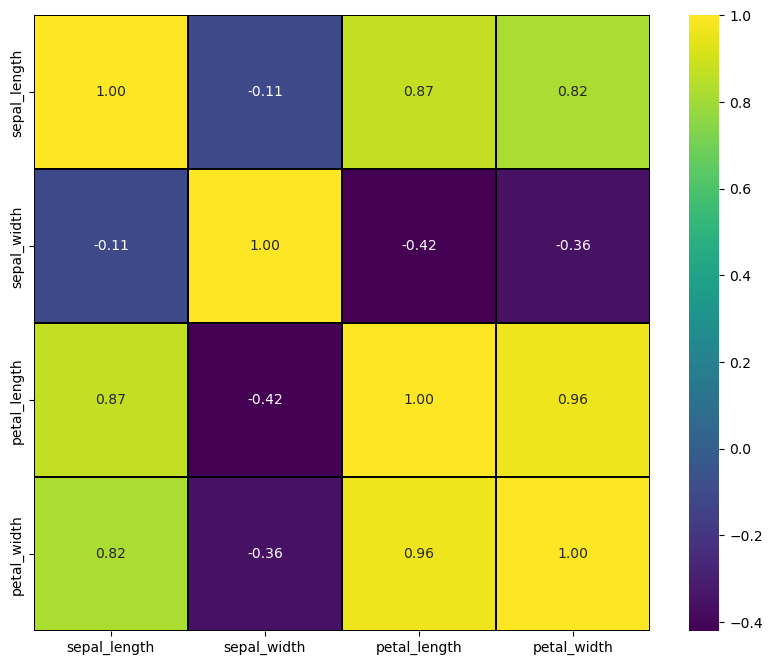

In [37]:
# visualizing the correlation
plt.figure(figsize=(10,8))
sns.heatmap(iris_data.corr(numeric_only=True),annot=True,cmap='viridis',linewidths=0.1,linecolor='black',fmt='.2f',square=True)
plt.show()

Showing the distribution of the numerical variable

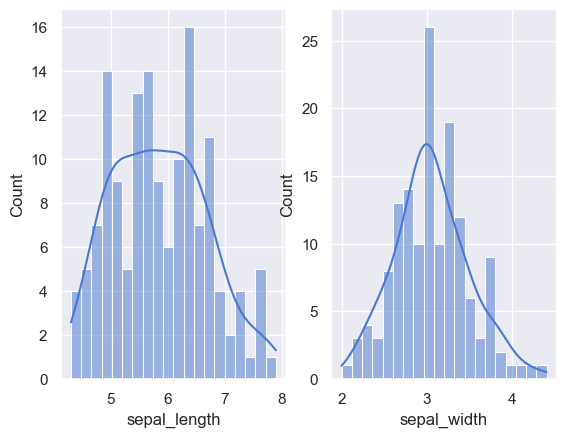

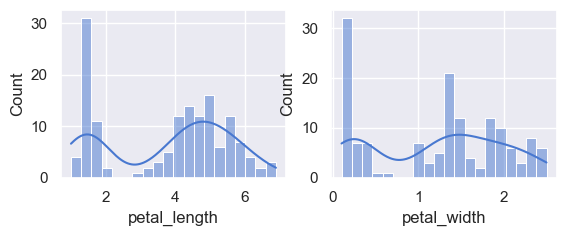

In [61]:
plt.subplot(1,2,1)
sns.histplot(data=iris_data,x='sepal_length',bins=20,kde=True)

plt.subplot(1,2,2)
sns.histplot(data=iris_data,x='sepal_width',bins=20,kde=True)
plt.show()


plt.subplot(2,2,1)
sns.histplot(data=iris_data,x='petal_length',bins=20,kde=True)

plt.subplot(2,2,2)
sns.histplot(data=iris_data,x='petal_width',bins=20,kde=True)

plt.show()

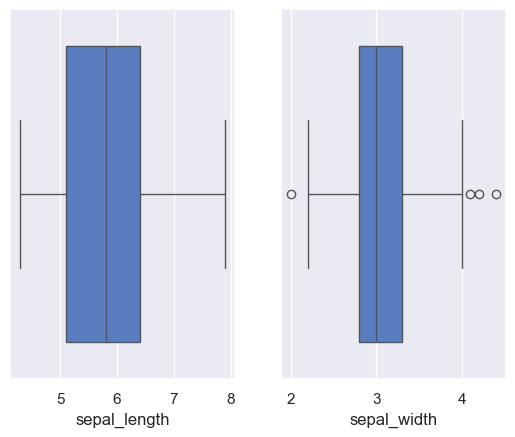

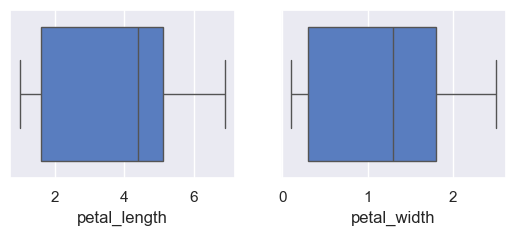

In [63]:
# checking for the outliers

plt.subplot(1,2,1)
sns.boxplot(data=iris_data,x='sepal_length')

plt.subplot(1,2,2)
sns.boxplot(data=iris_data,x='sepal_width')
plt.show()


plt.subplot(2,2,1)
sns.boxplot(data=iris_data,x='petal_length')

plt.subplot(2,2,2)
sns.boxplot(data=iris_data,x='petal_width')

plt.show()

In [77]:
# removing the outliers in the sepal width column

Q1 =iris_data['sepal_width'].quantile(0.25)
Q3 = iris_data['sepal_width'].quantile(0.75)

IQR = Q3 - Q1

lower_bound =Q1 - 1.5 * IQR
upper_bound =Q1 + 1.5 * IQR

iris = iris_data[(iris_data['sepal_width'] >= lower_bound) & (iris_data['sepal_width'] <= upper_bound)]


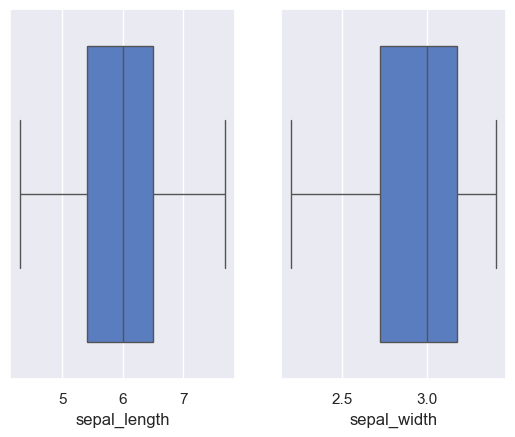

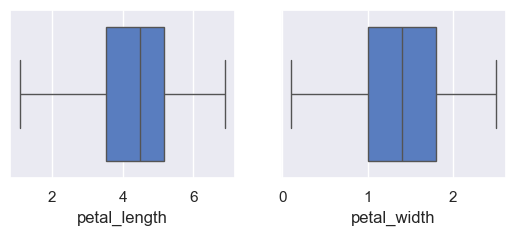

In [79]:
# checking for the outliers

plt.subplot(1,2,1)
sns.boxplot(data=iris,x='sepal_length')

plt.subplot(1,2,2)
sns.boxplot(data=iris,x='sepal_width')
plt.show()


plt.subplot(2,2,1)
sns.boxplot(data=iris,x='petal_length')

plt.subplot(2,2,2)
sns.boxplot(data=iris,x='petal_width')

plt.show()

Visualizing the relationship between numerical column and the target variables


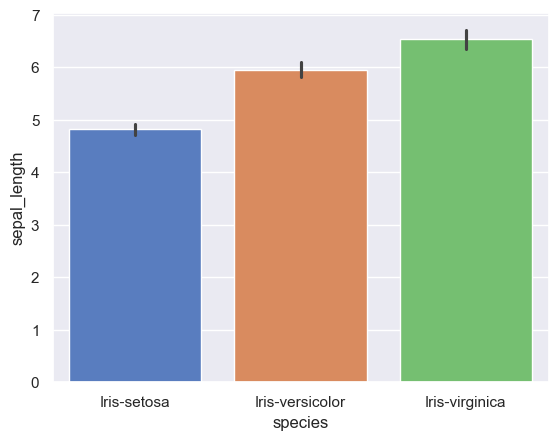

In [95]:
sns.barplot(data=iris, y='sepal_length',x='species',palette='muted')
plt.show()

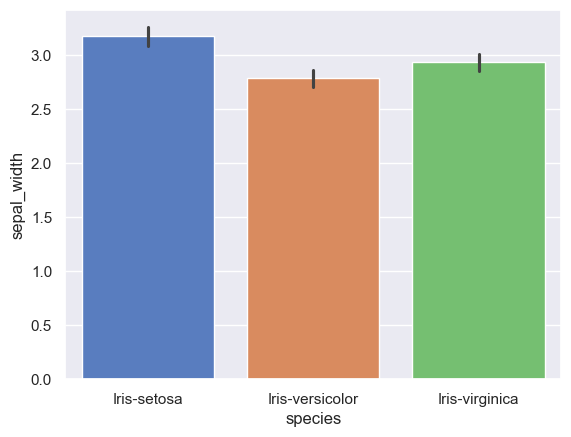

In [97]:
sns.barplot(data=iris, y='sepal_width',x='species',palette='muted')
plt.show()

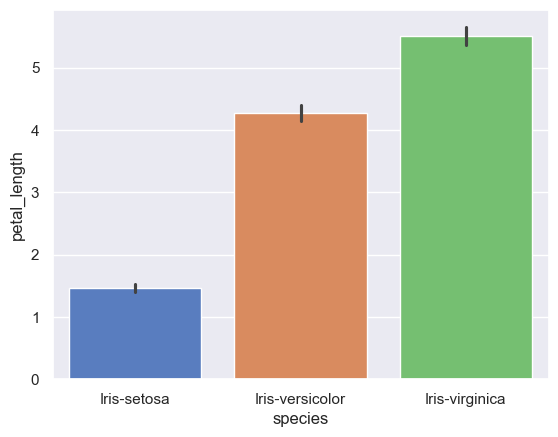

In [99]:
sns.barplot(data=iris, y='petal_length',x='species',palette='muted')
plt.show()

In [ ]:
sns.barplot(data=iris, y='sepal_length',x='species',palette='muted')
plt.show()